# PyCaret Testing

Testing model creation with PyCaret package

In [1]:
import pandas as pd

In [2]:
# Load Data
train = pd.read_feather("/home/jovyan/work/ray_experiments/data/train_feat_1_baseline.feather")

In [3]:
train.columns

Index(['ID_code', 'target', 'var_0', 'var_1', 'var_2', 'var_3', 'var_4',
       'var_5', 'var_6', 'var_7',
       ...
       'count_var_195', 'in_test_var_195', 'count_var_196', 'in_test_var_196',
       'count_var_197', 'in_test_var_197', 'count_var_198', 'in_test_var_198',
       'count_var_199', 'in_test_var_199'],
      dtype='object', length=602)

In [42]:
micro_test = train[train.columns[1:50]]

In [43]:
micro_test.columns

Index(['target', 'var_0', 'var_1', 'var_2', 'var_3', 'var_4', 'var_5', 'var_6',
       'var_7', 'var_8', 'var_9', 'var_10', 'var_11', 'var_12', 'var_13',
       'var_14', 'var_15', 'var_16', 'var_17', 'var_18', 'var_19', 'var_20',
       'var_21', 'var_22', 'var_23', 'var_24', 'var_25', 'var_26', 'var_27',
       'var_28', 'var_29', 'var_30', 'var_31', 'var_32', 'var_33', 'var_34',
       'var_35', 'var_36', 'var_37', 'var_38', 'var_39', 'var_40', 'var_41',
       'var_42', 'var_43', 'var_44', 'var_45', 'var_46', 'var_47'],
      dtype='object')

In [44]:
micro_test.shape

(200000, 49)

Building PyCaret Experiment

In [45]:
from pycaret.classification import *

In [46]:
exp_clf101 = setup(data = micro_test, target = 'target', session_id=123, use_gpu=True)

,Description,Value
0,session_id,123
1,Target,target
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(200000, 49)"
5,Missing Values,False
6,Numeric Features,48
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


# Modelling with PyCaret

In [47]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.9015,0.7325,0.0365,0.6383,0.0691,0.0589,0.1360,5.3820
nb,Naive Bayes,0.9014,0.7242,0.0371,0.6290,0.0701,0.0595,0.1357,0.1220
ada,Ada Boost Classifier,0.9007,0.7213,0.0550,0.5379,0.0998,0.0829,0.1484,58.7700
gbc,Gradient Boosting Classifier,0.9007,0.7224,0.0145,0.6649,0.0283,0.0242,0.0877,282.2530
lr,Logistic Regression,0.9006,0.7029,0.0108,0.7112,0.0214,0.0184,0.0793,25.4670
qda,Quadratic Discriminant Analysis,0.9006,0.7114,0.0385,0.5516,0.0720,0.0597,0.1262,0.5430
lda,Linear Discriminant Analysis,0.9006,0.7029,0.0121,0.6962,0.0237,0.0204,0.0825,0.8960
lightgbm,Light Gradient Boosting Machine,0.9006,0.7242,0.0230,0.5828,0.0442,0.0369,0.1010,8.0470
ridge,Ridge Classifier,0.8999,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.1380
rf,Random Forest Classifier,0.8999,0.6914,0.0004,0.2500,0.0007,0.0006,0.0082,63.4210


# XGB Model

In [48]:
xgb_model = create_model('xgboost', fold = 5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8977,0.6922,0.0589,0.4209,0.1033,0.0807,0.1274
1,0.8971,0.6973,0.0639,0.4096,0.1105,0.0858,0.1299
2,0.8971,0.6998,0.0582,0.4025,0.1017,0.0784,0.1221
3,0.8985,0.7032,0.0703,0.4529,0.1217,0.0974,0.1477
4,0.8959,0.6943,0.0639,0.3809,0.1094,0.0831,0.1222
Mean,0.8973,0.6974,0.0630,0.4133,0.1093,0.0851,0.1299
SD,0.0008,0.0039,0.0044,0.0237,0.0071,0.0067,0.0094


In [49]:
# tune_model
tuned_xgb = tune_model(xgb_model, optimize = 'AUC')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.2200,0.7267,0.9679,0.1109,0.1989,0.0236,0.0946
1,0.2143,0.7209,0.9729,0.1106,0.1986,0.0230,0.0951
2,0.2138,0.7178,0.9643,0.1098,0.1971,0.0212,0.0871
3,0.2169,0.7171,0.9650,0.1102,0.1978,0.0222,0.0900
4,0.2104,0.7319,0.9672,0.1096,0.1969,0.0209,0.0873
5,0.2108,0.7186,0.9729,0.1102,0.1979,0.0221,0.0927
6,0.2172,0.7281,0.9672,0.1104,0.1983,0.0227,0.0920
7,0.2131,0.7211,0.9679,0.1100,0.1976,0.0217,0.0898
8,0.2131,0.7091,0.9622,0.1095,0.1966,0.0206,0.0848
9,0.2192,0.7265,0.9693,0.1109,0.1990,0.0237,0.0953


In [50]:
plot_model(xgb_model, plot = 'parameter')

,Parameters
objective,binary:logistic
base_score,0.5
booster,gbtree
colsample_bylevel,1
colsample_bynode,1
colsample_bytree,1
gamma,0
gpu_id,0
importance_type,gain
interaction_constraints,


# Light GBM 

In [51]:
lightgbm_model = create_model('lightgbm', fold = 5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9005,0.7210,0.0221,0.5688,0.0426,0.0354,0.0976
1,0.9006,0.7236,0.0214,0.5882,0.0413,0.0345,0.0984
2,0.9004,0.7269,0.0189,0.5761,0.0366,0.0305,0.0911
3,0.9011,0.7266,0.0246,0.6571,0.0475,0.0405,0.1139
4,0.9005,0.7201,0.0214,0.5769,0.0413,0.0344,0.0970
Mean,0.9006,0.7236,0.0217,0.5934,0.0419,0.0351,0.0996
SD,0.0003,0.0028,0.0018,0.0325,0.0035,0.0032,0.0076


In [52]:
# tune_model
tuned_lightgbm = tune_model(lightgbm_model, optimize = 'AUC')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9010,0.7328,0.0143,0.8000,0.0281,0.0246,0.0986
1,0.9002,0.7239,0.0086,0.6000,0.0169,0.0141,0.0630
2,0.9006,0.7234,0.0114,0.7273,0.0225,0.0195,0.0829
3,0.9007,0.7263,0.0114,0.7619,0.0225,0.0196,0.0855
4,0.9009,0.7396,0.0114,0.8889,0.0226,0.0201,0.0943
5,0.8999,0.7227,0.0064,0.5000,0.0127,0.0102,0.0478
6,0.9004,0.7384,0.0114,0.6154,0.0224,0.0188,0.0741
7,0.9006,0.7258,0.0079,0.9167,0.0156,0.0139,0.0797
8,0.9008,0.7139,0.0128,0.7500,0.0253,0.0220,0.0897
9,0.9012,0.7314,0.0157,0.8462,0.0308,0.0273,0.1072


# Catboost

In [53]:
catboost_model = create_model('catboost', fold = 5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9012,0.7300,0.0346,0.6178,0.0656,0.0555,0.1296
1,0.9015,0.7303,0.0375,0.6325,0.0708,0.0602,0.1370
2,0.9016,0.7349,0.0343,0.6667,0.0652,0.0559,0.1357
3,0.9019,0.7371,0.0368,0.6821,0.0698,0.0601,0.1428
4,0.9014,0.7292,0.0353,0.6266,0.0669,0.0568,0.1322
Mean,0.9015,0.7323,0.0357,0.6451,0.0676,0.0577,0.1355
SD,0.0002,0.0031,0.0012,0.0248,0.0022,0.0020,0.0045


In [54]:
tuned_catboost = tune_model(catboost_model, optimize = 'AUC')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9002,0.7323,0.0057,0.6667,0.0113,0.0096,0.0553
1,0.9000,0.7227,0.0021,0.6000,0.0043,0.0036,0.0315
2,0.9005,0.7236,0.0086,0.7500,0.0169,0.0147,0.0733
3,0.9004,0.7268,0.0057,0.8889,0.0113,0.0101,0.0667
4,0.9005,0.7374,0.0071,0.8333,0.0142,0.0125,0.0716
5,0.9001,0.7217,0.0043,0.6667,0.0085,0.0072,0.0479
6,0.9001,0.7364,0.0057,0.6154,0.0113,0.0095,0.0524
7,0.9007,0.7266,0.0107,0.7895,0.0211,0.0185,0.0847
8,0.9003,0.7149,0.0071,0.6667,0.0141,0.0120,0.0618
9,0.9004,0.7326,0.0079,0.7333,0.0155,0.0134,0.0691


# Bagging Tests

In [55]:
bagged_xgb = ensemble_model(tuned_xgb, optimize = 'AUC')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.2251,0.7295,0.9622,0.1110,0.1990,0.0239,0.0932
1,0.2268,0.7209,0.9700,0.1119,0.2007,0.0259,0.1010
2,0.2179,0.7217,0.9665,0.1105,0.1983,0.0227,0.0919
3,0.2279,0.7223,0.9600,0.1112,0.1993,0.0242,0.0933
4,0.2181,0.7363,0.9672,0.1106,0.1984,0.0229,0.0926
5,0.2224,0.7199,0.9657,0.1110,0.1991,0.0238,0.0943
6,0.2256,0.7314,0.9679,0.1116,0.2001,0.0252,0.0984
7,0.2201,0.7231,0.9700,0.1111,0.1993,0.0240,0.0965
8,0.2208,0.7127,0.9629,0.1105,0.1983,0.0228,0.0908
9,0.2177,0.7311,0.9686,0.1106,0.1986,0.0231,0.0936


In [56]:
bagged_lightgbm = ensemble_model(tuned_lightgbm, optimize = 'AUC')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9006,0.7363,0.0121,0.7083,0.0239,0.0206,0.0840
1,0.9005,0.7286,0.0107,0.6818,0.0211,0.0180,0.0769
2,0.9005,0.7273,0.0128,0.6429,0.0252,0.0214,0.0810
3,0.9006,0.7315,0.0093,0.7647,0.0183,0.0160,0.0772
4,0.9009,0.7457,0.0121,0.8500,0.0239,0.0212,0.0945
5,0.9000,0.7275,0.0064,0.5294,0.0127,0.0103,0.0499
6,0.9006,0.7423,0.0107,0.7143,0.0211,0.0182,0.0793
7,0.9009,0.7298,0.0128,0.8182,0.0253,0.0223,0.0949
8,0.9006,0.7207,0.0114,0.6957,0.0225,0.0193,0.0805
9,0.9016,0.7353,0.0186,0.8966,0.0364,0.0324,0.1209


In [57]:
bagged_catboost = ensemble_model(tuned_catboost, optimize = 'AUC')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9004,0.7311,0.0057,0.8000,0.0113,0.0099,0.0624
1,0.8999,0.7227,0.0029,0.5000,0.0057,0.0045,0.0319
2,0.9003,0.7228,0.0050,0.7778,0.0099,0.0087,0.0573
3,0.9002,0.7269,0.0036,0.8333,0.0071,0.0063,0.0506
4,0.9002,0.7369,0.0029,1.0000,0.0057,0.0051,0.0507
5,0.8999,0.7212,0.0021,0.5000,0.0043,0.0034,0.0276
6,0.9002,0.7370,0.0043,0.7500,0.0085,0.0074,0.0518
7,0.9004,0.7261,0.0064,0.8182,0.0127,0.0112,0.0671
8,0.9002,0.7135,0.0050,0.7000,0.0099,0.0085,0.0534
9,0.9002,0.7328,0.0043,0.7500,0.0085,0.0074,0.0518


# Boosting ensemble_model

In [58]:
boosted_xgb = ensemble_model(tuned_xgb, method = 'Boosting', optimize = 'AUC')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8999,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
1,0.8999,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.8999,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.8999,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.8999,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
5,0.8999,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
6,0.8999,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
7,0.8999,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
8,0.8999,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000
9,0.8999,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000


In [59]:
merge_boost = create_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8969,0.7011,0.0542,0.3918,0.0953,0.0727,0.1152
1,0.8969,0.6876,0.0564,0.3950,0.0987,0.0756,0.1183
2,0.8976,0.6947,0.0664,0.4266,0.1149,0.0904,0.1368
3,0.8981,0.6992,0.0564,0.4317,0.0997,0.0784,0.1272
4,0.8991,0.7078,0.0735,0.4725,0.1272,0.1031,0.1561
5,0.8951,0.6884,0.0493,0.3350,0.0859,0.0618,0.0956
6,0.8982,0.7129,0.0728,0.4474,0.1252,0.1000,0.1489
7,0.8978,0.6884,0.0635,0.4279,0.1106,0.0870,0.1341
8,0.8968,0.6813,0.0657,0.4035,0.1130,0.0874,0.1301
9,0.8996,0.7064,0.0764,0.4908,0.1322,0.1081,0.1638


In [60]:
blendy = blend_models(estimator_list = [bagged_xgb, bagged_lightgbm, bagged_catboost], 
                      optimize = 'AUC')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9012,0.7336,0.0671,0.5529,0.1197,0.1002,0.1673
1,0.8999,0.7250,0.0600,0.4970,0.1070,0.0873,0.1462
2,0.9010,0.7251,0.0742,0.5389,0.1305,0.1089,0.1729
3,0.9021,0.7277,0.0678,0.5938,0.1217,0.1033,0.1769
4,0.9018,0.7407,0.0700,0.5765,0.1248,0.1054,0.1760
5,0.8991,0.7242,0.0542,0.4634,0.0971,0.0778,0.1318
6,0.9016,0.7375,0.0735,0.5659,0.1301,0.1096,0.1782
7,0.9011,0.7274,0.0678,0.5491,0.1207,0.1009,0.1674
8,0.8999,0.7168,0.0685,0.5000,0.1205,0.0988,0.1571
9,0.9025,0.7344,0.0735,0.6059,0.1311,0.1119,0.1869


# Plot out models

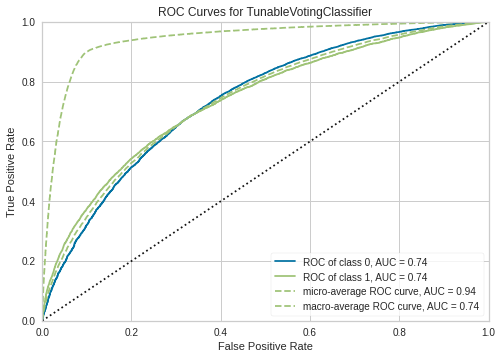

In [61]:
plot_model(blendy, plot = 'auc')

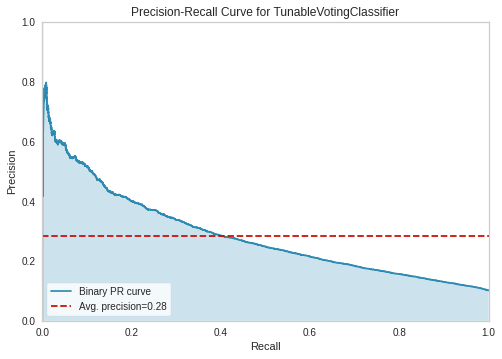

In [62]:
plot_model(blendy, plot = 'pr')

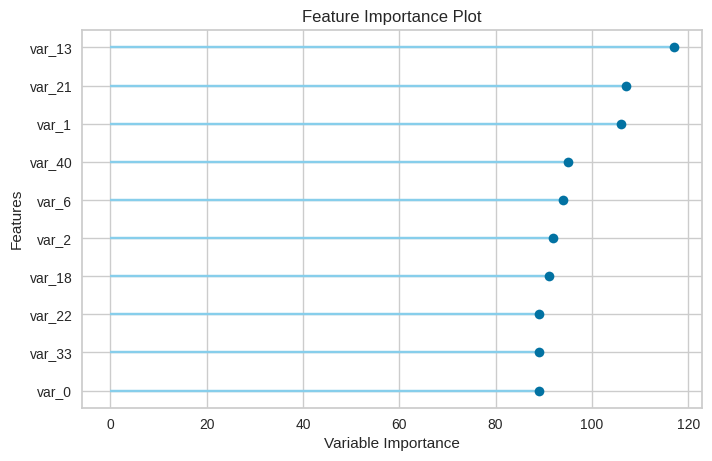

In [63]:
plot_model(tuned_lightgbm, plot='feature')